In [7]:
import cv2 
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import string
import pandas as pd
#for building the model
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models,layers
from keras.utils import to_categorical
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [8]:
df='D:\Resize'

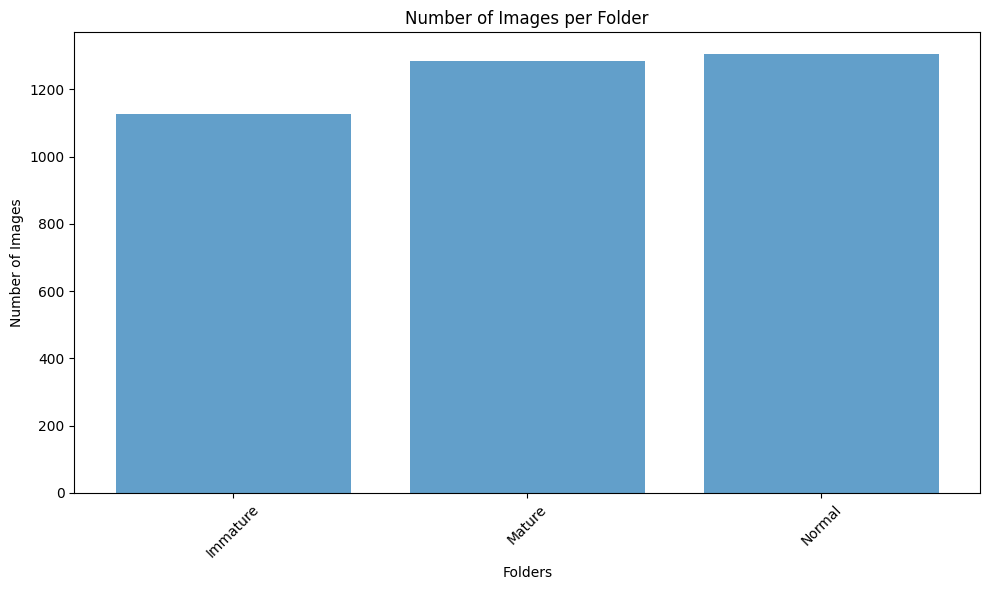

In [9]:
# Directory containing folders with images
root_dir = 'D:\Resize'

# Dictionary to store counts for each folder
folder_counts = {}

# Iterate through each folder in the root directory
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Count the number of image files in the folder
        num_images = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name)) and name.lower().endswith(('.png', '.jpg', '.jpeg'))])
        folder_counts[folder] = num_images

# Extract folder names and corresponding counts
folders = list(folder_counts.keys())
counts = list(folder_counts.values())

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(folders)), counts, align='center', alpha=0.7)
plt.xticks(range(len(folders)), folders, rotation=45)
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images per Folder')
plt.tight_layout()
plt.show()

In [10]:
immature = os.listdir(os.path.join(df, r'D:\Resize\Immature'))

mature = os.listdir(os.path.join(df, r'D:\Resize\Mature'))

normal = os.listdir(os.path.join(df, r'D:\Resize\Normal'))

In [11]:
X=[] #holding data
Y=[] #label

In [12]:
immature_dir = r'D:\Resize\Immature'
immature = os.listdir(immature_dir)

for image_name in immature:
    file_path = os.path.join(immature_dir, image_name)
    image = Image.open(file_path).convert('RGB')
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image).astype('float32') / 255.0)
    Y.append(0)

In [13]:
# MATURE
mature_dir = r'D:\Resize\Mature'
mature = os.listdir(mature_dir)

for image_name in mature:
    file_path = os.path.join(mature_dir, image_name)
    image = Image.open(file_path).convert('RGB')
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image).astype('float32') / 255.0)
    Y.append(1)

In [14]:
# NORMAL
normal_dir = r'D:\Resize\Normal'
normal = os.listdir(normal_dir)

for image_name in normal:
    file_path = os.path.join(normal_dir, image_name)
    image = Image.open(file_path).convert('RGB')
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image).astype('float32') / 255.0)
    Y.append(2)

In [15]:
import numpy as np
print(np.unique(Y, return_counts=True))


(array([0, 1, 2]), array([1125, 1283, 1304], dtype=int64))


In [16]:
X[1]

array([[[0.69803923, 0.44705883, 0.19607843],
        [0.6901961 , 0.43529412, 0.2       ],
        [0.6784314 , 0.42352942, 0.20392157],
        ...,
        [0.9254902 , 0.65882355, 0.38431373],
        [0.92156863, 0.6509804 , 0.3764706 ],
        [0.95686275, 0.70980394, 0.42745098]],

       [[0.627451  , 0.3764706 , 0.13725491],
        [0.5764706 , 0.32156864, 0.10196079],
        [0.49019608, 0.23529412, 0.04313726],
        ...,
        [0.94509804, 0.73333335, 0.4862745 ],
        [0.9137255 , 0.7137255 , 0.46666667],
        [0.9843137 , 0.84313726, 0.58431375]],

       [[0.53333336, 0.2784314 , 0.05882353],
        [0.6039216 , 0.34901962, 0.1254902 ],
        [0.61960787, 0.36862746, 0.13725491],
        ...,
        [0.94509804, 0.68235296, 0.43529412],
        [0.90588236, 0.6117647 , 0.37254903],
        [0.90588236, 0.5882353 , 0.3529412 ]],

       ...,

       [[0.61960787, 0.32156864, 0.14117648],
        [0.5568628 , 0.25882354, 0.07843138],
        [0.63529414, 0

Shape: (64, 64, 3)
Dtype: float32
Min: 0.0 Max: 1.0


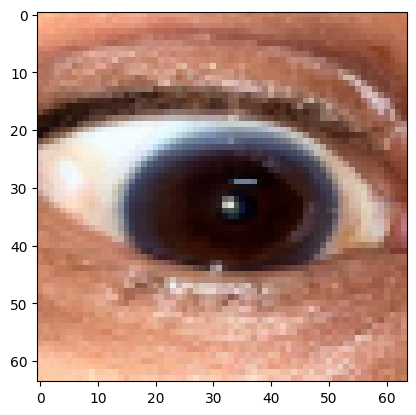

In [17]:
image_array = X[5]
print("Shape:", image_array.shape)
print("Dtype:", image_array.dtype)
print("Min:", image_array.min(), "Max:", image_array.max())
plt.imshow(image_array)
plt.show()


In [18]:
#seeing the length of Y
len(Y)

3712

In [19]:
#seeing the length of Y
len(Y)

3712

In [20]:
# turning Y to np array 
Y = np.array(Y)

In [21]:
#getting the shape of Y 
Y.shape

(3712,)

In [22]:
# turning X to np array 
X= np.array(X)

In [23]:
X.shape

(3712, 64, 64, 3)

In [24]:
# Split the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [25]:
#shape of x_train & y_train
#we will see the number of images will do training(8000) and the size(64,64) and the channels(RGB)
print(x_train.shape)
print(y_train.shape)

(2969, 64, 64, 3)
(2969,)


In [26]:
#shape of x_test & y_test
#we will see the number of images will do testing(2000) and the size(64,64) and the channels(RGB)
print(x_test.shape)
print(y_test.shape)

(743, 64, 64, 3)
(743,)


In [27]:
# Find the unique classes in y_test
unique_classes_test = np.unique(y_test)
print("Unique classes in y_test:", unique_classes_test)

Unique classes in y_test: [0 1 2]


In [28]:
# Convert y_train and y_test to one-hot encoded format
y_train = to_categorical(y_train , num_classes=3)
y_test = to_categorical(y_test , num_classes=3)

In [29]:
y_train[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [30]:
y_test[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [39]:
# Jumlah kelas
num_classes = 3

# Model sederhana
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Training
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32,
    shuffle=True,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
93/93 [==============================] - 1s 6ms/step - loss: 1.0578 - accuracy: 0.4604 - val_loss: 0.8794 - val_accuracy: 0.6460
Epoch 2/50
93/93 [==============================] - 0s 4ms/step - loss: 0.7764 - accuracy: 0.6666 - val_loss: 0.5930 - val_accuracy: 0.7618
Epoch 3/50
93/93 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7804 - val_loss: 0.4263 - val_accuracy: 0.8466
Epoch 4/50
93/93 [==============================] - 0s 4ms/step - loss: 0.3466 - accuracy: 0.8676 - val_loss: 0.2518 - val_accuracy: 0.9098
Epoch 5/50
93/93 [==============================] - 0s 4ms/step - loss: 0.2267 - accuracy: 0.9182 - val_loss: 0.1804 - val_accuracy: 0.9367
Epoch 6/50
93/93 [==============================] - 0s 4ms/step - loss: 0.1598 - accuracy: 0.9421 - val_loss: 0.1350 - val_accuracy: 0.9664
Epoch 7/50
93/93 [==============================] - 0s 4ms/step - loss: 0.1318 - accuracy: 0.9566 - val_loss: 0.1314 - val_accuracy: 0.9637
Epoch 8/50
93/93 [==

In [40]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the model's performance
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.0590
Test Accuracy: 98.38%


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

24/24 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       248
           1       0.98      0.97      0.97       241
           2       0.98      1.00      0.99       254

    accuracy                           0.98       743
   macro avg       0.98      0.98      0.98       743
weighted avg       0.98      0.98      0.98       743

Confusion Matrix:
[[244   4   0]
 [  3 234   4]
 [  0   1 253]]


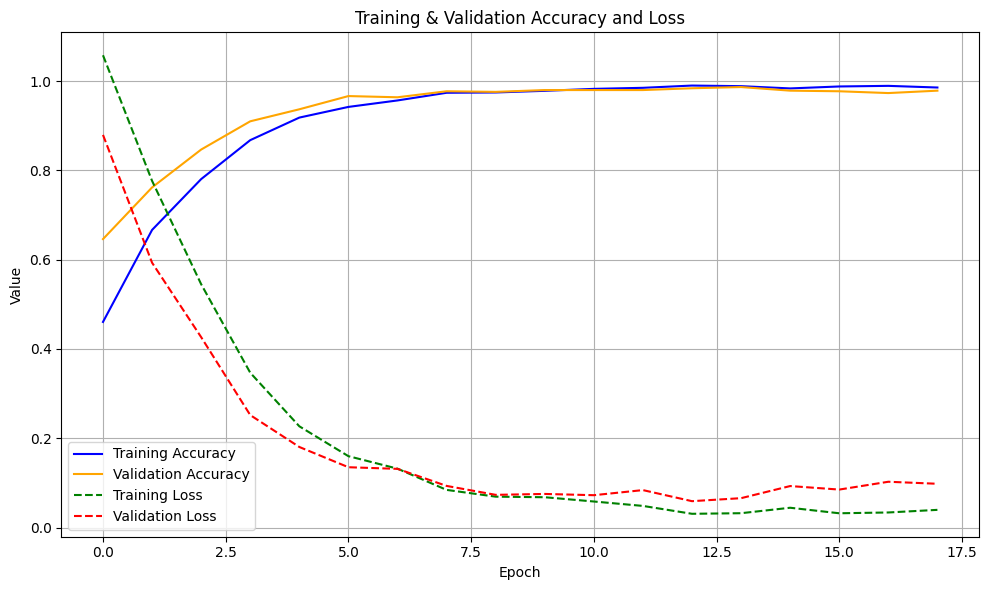

In [42]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Loss
plt.plot(history.history['loss'], label='Training Loss', color='green', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training & Validation Accuracy and Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


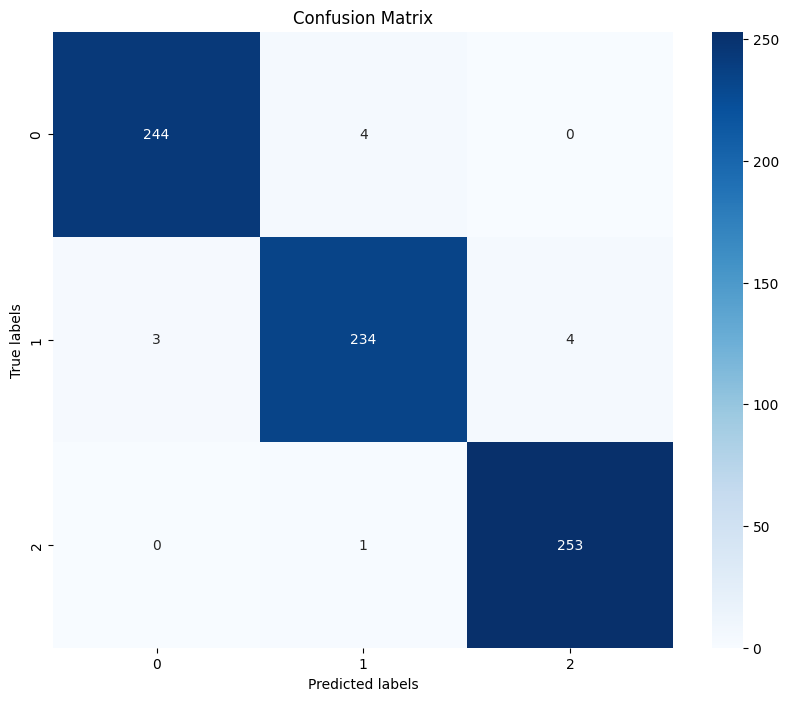

In [43]:
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 12ms/step


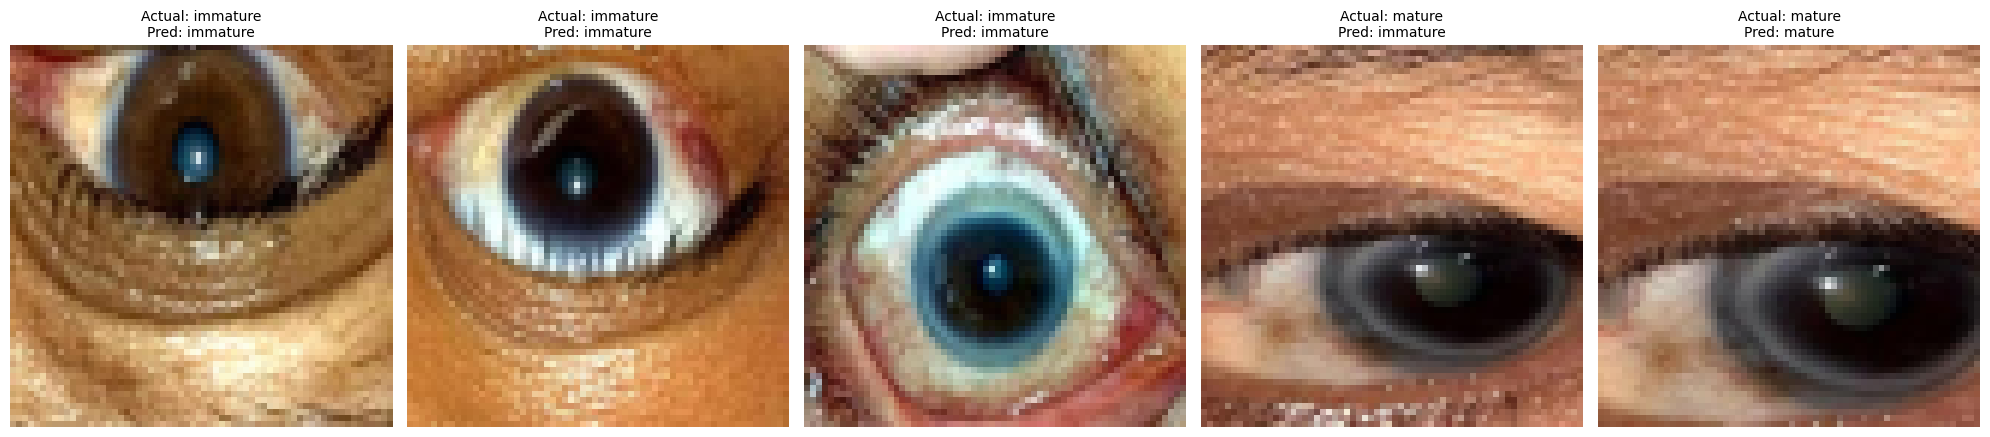

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Label klasifikasi
disease_labels = ['immature', 'mature', 'normal']

# Subplot 5 gambar + prediksi
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    current_image = x_test[i]
    actual_label = y_test[i]

    # Prediksi model
    prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(prediction)
    
    # Nama kelas
    predicted_class = disease_labels[predicted_label]
    actual_class = disease_labels[np.argmax(actual_label)]

    # Plot gambar
    axes[i].imshow(current_image)
    axes[i].axis('off')
    axes[i].set_title(f'Actual: {actual_class}\nPred: {predicted_class}', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#model.save('saved_model_cataract')  # Folder akan dibuat